El sistema de medición de la Estación Manizales de Ecopetrol se compone de una serie de componentes claves que garantizan su funcionamiento eficiente. Este sistema incluye una válvula de corte, una válvula reguladora de presión, un sistema de filtración, un enderezador de flujo, un medidor tipo turbina, una válvula reguladora de flujo y un sistema conectado a tanques, como se detalla en el siguiente diagrama.

In [1]:
from moviepy.editor import VideoFileClip
import cv2

def reproducir_video(ruta):
   
    video = VideoFileClip(ruta)

    cap = cv2.VideoCapture(ruta)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        try:
            cv2.imshow('Video', frame)
            # Presionar 'q' para salir
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        except Exception as e:
            print("Ocurrió un error:", e)
            break

    cap.release()
    cv2.destroyAllWindows()

ruta_video = "Video_multiple.mp4"

reproducir_video(ruta_video)

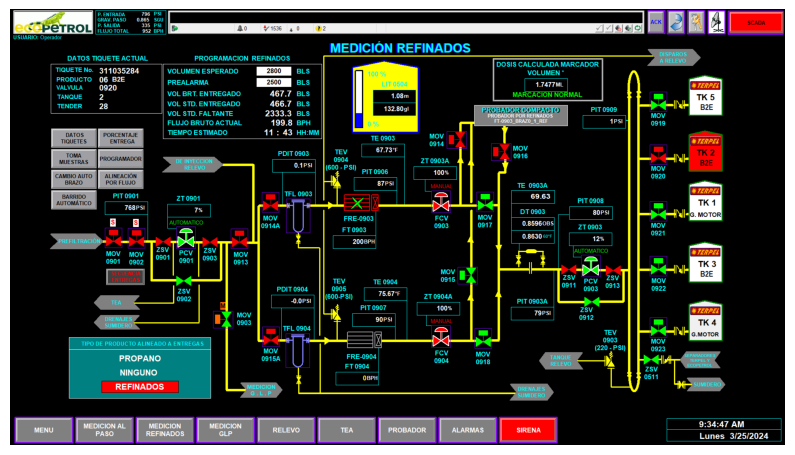

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ruta_diagrama1 = 'Diagrama1.png'

diagrama1 = mpimg.imread(ruta_diagrama1)

plt.figure(figsize=(22, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(diagrama1)
plt.axis('off')  

plt.show()

Las características principales del sistema de medición son las siguientes:
* 	Presión de entrada: 700 psi.
*	Presión de salida: 80 psi.
*	Caudal de entrega: 200 barriles por hora. 
*	Diámetro tubería principal: 6 in. 
*	Diámetro enderezador de flujo: 2 in.
*	Diámetro turbina de medición: 2 in.
*	Longitud del enderezador de flujo: 62 in. 
*	Rugosidad tubería del enderezador de flujo 40% L según fabricante: 0.025
*	Rugosidad tubería del enderezador de flujo 60% L según fabricante: 0.375
*   Viscosidad cinemática de la gasolina: 2.8e-6 (m^2/s)

A continuación se muestra parte del sistema de medición de la Estación Manizales:

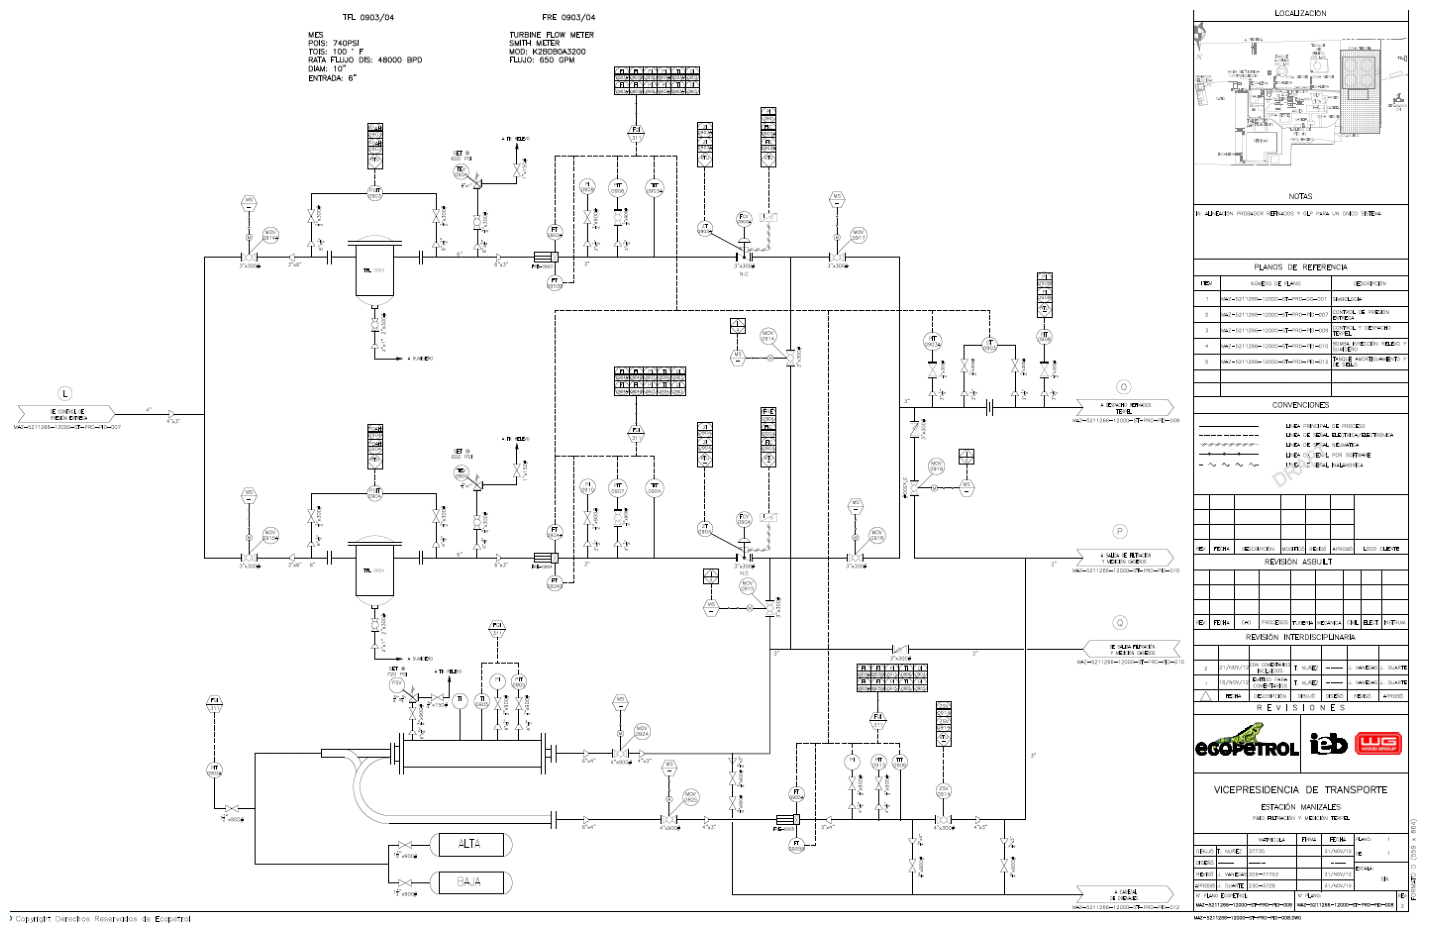

In [3]:
ruta_imagen1 = 'Diagrama_control.png'

imagen1 = mpimg.imread(ruta_imagen1)

plt.figure(figsize=(40, 40))
 
plt.subplot(1, 2, 2)
plt.imshow(imagen1)
plt.axis('off')  

plt.show()

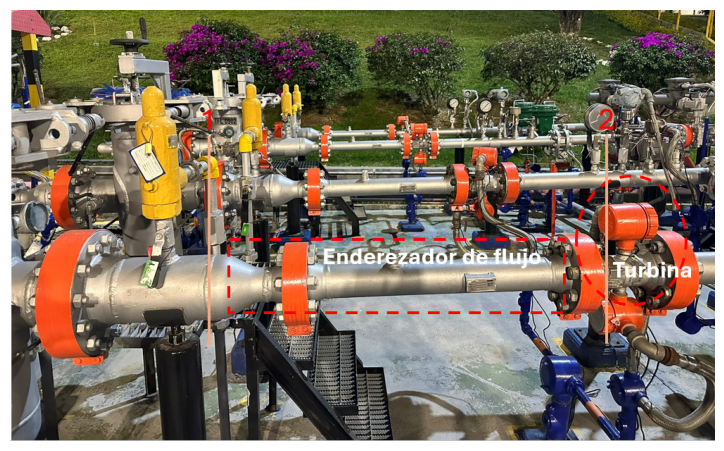

In [4]:
ruta_imagen1 = 'Imagen1.png'

imagen1 = mpimg.imread(ruta_imagen1)

plt.figure(figsize=(20, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(imagen1)
plt.axis('off')  

plt.show()

El sistema se dividirá en dos partes: el punto 1 representa la sección de entrada al enderezador de flujo con un diámetro de 6 pulgadas, mientras que la sección 2 representa la salida del enderezador de flujo hacia la turbina con un diámetro de 2 pulgadas.

Conociendo el diámetro y el caudal que está pasando por el sistema, al aplicar la ecuación de continuidad se calculará la velocidad del flujo antes de la reducción y el valor de Reynolds en este punto.

Q= V/A (Ecuación de continuidad)
donde:
Q = Caudal (m3/h)
V = Velocidad (m/s)
A = Área (m2)

Re = V*D/U (Ecuación de Reynolds)
donde:
Re = Número de Reynolds
V = Velocidad (m/s)
D = Diámetro de la tubería (m)
U = Viscosidad cinemática del fluido (m2/s)

In [5]:
import math

caudal_barriles_por_hora = 200  
diametro1_pulgadas = 6  


diametro1_metros = diametro1_pulgadas * 0.0254  # 1 pulgada = 0.0254 metros

caudal_metros_cubicos_por_hora = caudal_barriles_por_hora * 0.1589873 # Convertir barriles por hora a metros cúbicos por hora

radio1_metros = diametro1_metros / 2

area1_metros_cuadrados = math.pi * radio1_metros ** 2

velocidad_flujo1 = caudal_metros_cubicos_por_hora / area1_metros_cuadrados


print("La velocidad del flujo en el punto 1 es:", velocidad_flujo1, "m/h")

La velocidad del flujo en el punto 1 es: 1743.141386724678 m/h


In [6]:
viscosidad_cinemática = 2.8e-6

velocidad1_metros_por_segundo = velocidad_flujo1 / 3600

# Calcular el número de Reynolds
Re1 = (velocidad1_metros_por_segundo * diametro1_metros) / viscosidad_cinemática

print("El número de Reynolds es:", Re1)

El número de Reynolds es: 26354.637632623104


Aplicando la ecuación de continuidad, encontramos que la velocidad de flujo en el punto 1 es de 1743.14 m/h, o lo que sería equivalente a decir 0.4842 m/s.

Cuando el número de Reynolds es mayor a 4000, se considera que el flujo es turbulento. En el punto 1, el flujo es turbulento, lo cual es de esperar ya que esta es la forma habitual y deseada de transportar los hidrocarburos.

Según el Manual de Medición Dinámica de Hidrocarburos de Ecopetrol (ECP-VSM-M-001-05), se establece que la longitud del enderezador de flujo debe ser de al menos 10 diámetros de la tubería principal. En el caso de la Estación Manizales, dado que la tubería tiene un diámetro de 6 pulgadas, la longitud mínima requerida es de 60 pulgadas.

Además, el fabricante establece que en el primer 40% de la longitud del enderezador de flujo, el factor de fricción es de 0.025, mientras que en el 60% restante será de 0.375.

La turbina instalada en la Estación Manizales tiene un rango óptimo de operación entre los números de Reynolds de 1000 y 8000.

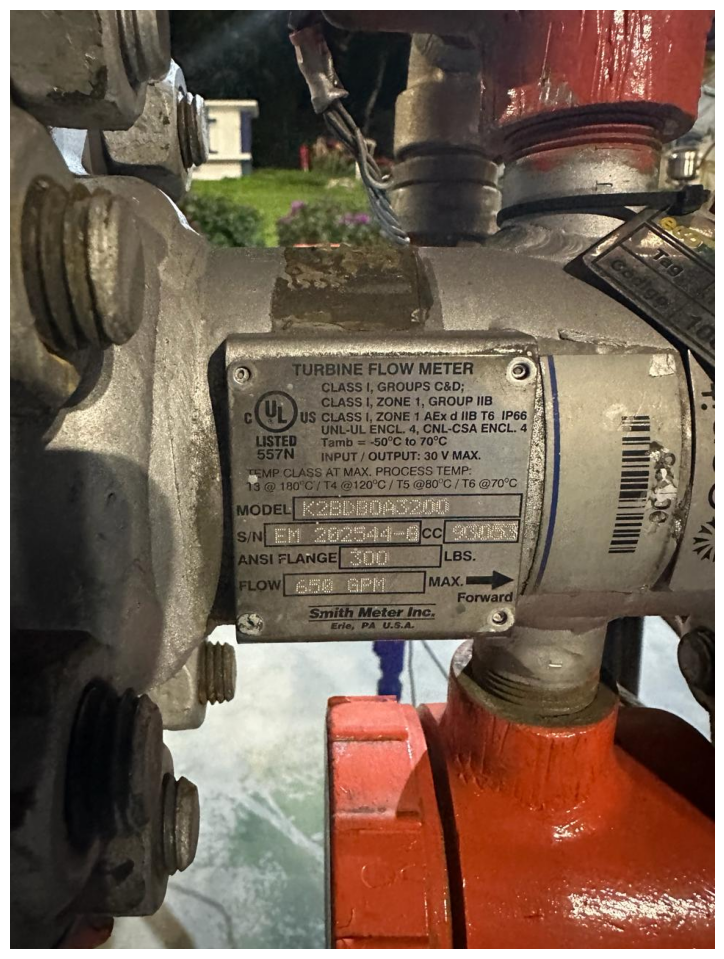

In [7]:
ruta_imagen2 = 'Imagen2.jpg'

imagen2 = mpimg.imread(ruta_imagen2)

plt.figure(figsize=(20, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(imagen2)
plt.axis('off')  

plt.show()

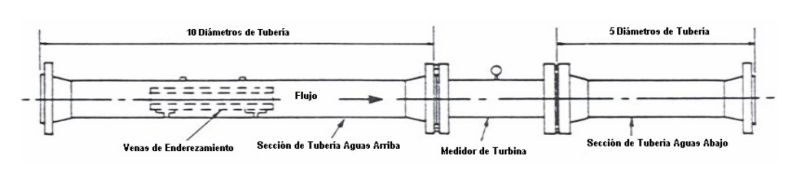

In [8]:
ruta_diagrama2 = 'Diagrama2.png'

diagrama2 = mpimg.imread(ruta_diagrama2)

plt.figure(figsize=(22, 20))
 
plt.subplot(1, 2, 2)
plt.imshow(diagrama2)
plt.axis('off')  

plt.show()

Se propone graficar un perfil de velocidad del flujo a lo largo del enderezador de flujo, utilizando la ecuación de Darcy-Weisbach, la cual se emplea en hidráulica para calcular la pérdida de carga debido a la fricción en el flujo de fluidos en tuberías. La ecuación se expresa como:

hf = (f*L*V^2)/(D*2g)

Donde: 
hf: Pérdida de carga (m).
f: Factor de fricción (adimensional).
L: Longitud de la tubería (m).
D: Diámetro de la tubería (m).
V: Velocidad del flujo (m/s).
g: Gravedad (m/s^2).

Para indicar el cambio de la velocidad del flujo con respecto a la longitud de la tubería, teniendo en cuenta el factor de fricción, se propone la siguiente derivada:

dV/dL = -(2gD/f) * V^2

Esta expresión representa la tasa de cambio de la velocidad del flujo (V) con respecto a una variación infinitesimal en la longitud de la tubería (L), lo cual es fundamental para comprender el comportamiento del flujo en sistemas de tuberías.

Para resolver el modelo, se propone utilizar el método de Runge-Kutta, que es un conjunto de técnicas numéricas empleadas para resolver ecuaciones diferenciales ordinarias (EDOs) y ecuaciones diferenciales parciales (EDPs). Estas técnicas integran aproximadamente las ecuaciones diferenciales paso a paso, lo que las hace especialmente útiles cuando no hay una solución analítica disponible o cuando la solución analítica es difícil de obtener.
El método de Runge-Kutta más comúnmente utilizado es el llamado "método de Runge-Kutta de cuarto orden", también conocido como RK4. Este método es particularmente popular debido a su buena precisión y eficiencia relativas.

La velocidad inicial para desarrollar la derivada será la que se encontró en el punto 1.

Velocidad final: 0.4105175865391899


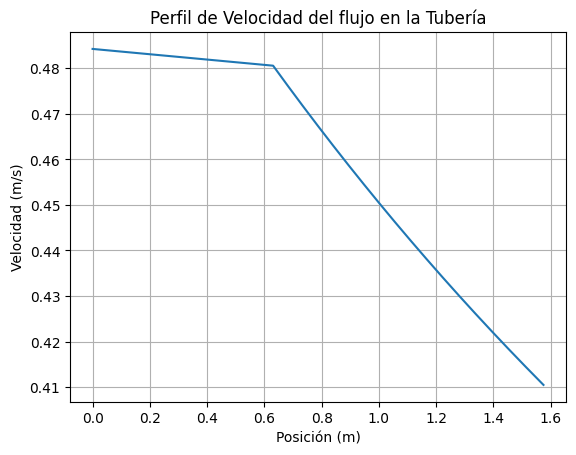

In [9]:
import numpy as np

longitud_enderezador_pulgadas = 62
L = 0.0254 * longitud_enderezador_pulgadas  # Longitud del enderezador de flujo en (m)
D = 0.0254 * 2  # Diámetro de la tubería (m)
g = 9.81  # Aceleración debido a la gravedad (m/s^2)
rugosidad_normal = 0.025  # Rugosidad normal de la tubería (m)
rugosidad_aumentada = 0.375 # Rugosidad aumentada en el último 60% de la tubería (m)
V0 = velocidad1_metros_por_segundo  # Velocidad inicial en m/s

# Ecuación diferencial
def dV_dx(x, V, f):
    return -f / (2 * g * D) * V ** 2

# Método de Runge-Kutta de cuarto orden
def runge_kutta_step(x, V, f, h):
    k1 = dV_dx(x, V, f)
    k2 = dV_dx(x + h / 2, V + h / 2 * k1, f)
    k3 = dV_dx(x + h / 2, V + h / 2 * k2, f)
    k4 = dV_dx(x + h, V + h * k3, f)
    return V + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

x_values = np.linspace(0, L, 1000)  # Posiciones a lo largo de la tubería

# Determinar dónde comienza la rugosidad aumentada
posicion_inicio_rugosidad_aumentada = int(0.4 * len(x_values))

# Lista para almacenar los valores de la velocidad
V_values = [V0]

# Resolución de la ecuación diferencial usando Runge-Kutta
h = L / len(x_values)  # Tamaño del paso
for i, x in enumerate(x_values[:-1]):
    if i >= posicion_inicio_rugosidad_aumentada:
        f_actual = rugosidad_aumentada
    else:
        f_actual = rugosidad_normal

    V_next = runge_kutta_step(x, V_values[-1], f_actual, h)
    V_values.append(V_next)

print("Velocidad final:", V_values[-1])
velocidad2_metros_por_segundo = V_values[-1]

plt.plot(x_values, V_values)
plt.xlabel('Posición (m)')
plt.ylabel('Velocidad (m/s)')
plt.title('Perfil de Velocidad del flujo en la Tubería')
plt.grid(True)
plt.show()

Lo siguiente es calcular el número de Reynolds para el punto 2 y verificar el régimen de flujo. Aunque el fabricante no lo especifique, se asumirá que los accesorios del enderezador de flujo reducirán el área de la tubería en un 20%, considerando un diámetro de 2 pulgadas.

In [10]:
diametro2_metros = 0.0254 * 2 * 0.8

Re2 = (velocidad2_metros_por_segundo * diametro2_metros) / viscosidad_cinemática

print("El número de Reynolds es:", Re2)

El número de Reynolds es: 5958.369541768814


El número de Reynolds en el punto 2 es de 5958.36, que es menor en comparación con el valor calculado para el punto 1. Por lo tanto, se puede decir que el flujo es menos turbulento en el punto 2 en comparación con el punto 1.

Aunque no se considera un flujo laminar debido a que es mayor de 2000, sí se puede afirmar que el flujo en el punto 2 tendrá una mejor distribución uniforme, lo cual afectará positivamente la medición en la turbina en comparación con si el flujo hubiera entrado a la turbina sin pasar por el enderezador de flujo.

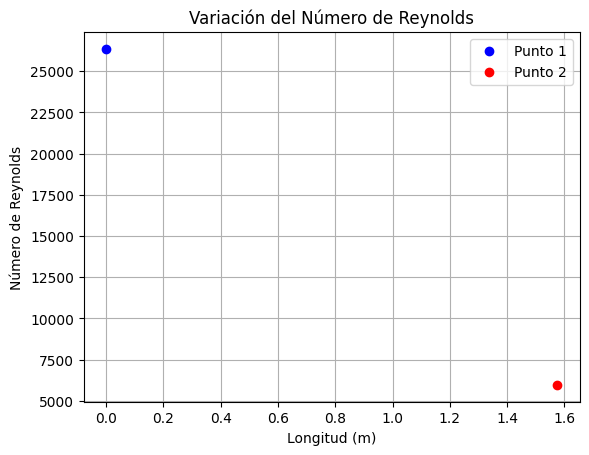

In [11]:
x1, y1 = 0, Re1
x2, y2 = 0.0254 * 62, Re2  

plt.plot(x1, y1, 'bo', label='Punto 1')
plt.plot(x2, y2, 'ro', label='Punto 2')

plt.xlabel('Longitud (m)')
plt.ylabel('Número de Reynolds')
plt.title('Variación del Número de Reynolds')
plt.legend()

plt.grid(True)
plt.show()

En la gráfica anterior se muestra la velocidad inicial a la entrada del enderezador y la velocidad a la salida.

A continuación se construye una tabla con diferentes longitudes del accesorio: 62, 92, 122, 152 y 182 pulgadas, y el número de Reynolds correspondiente a cada longitud calculado con las condiciones de la Estación Manizales. Esto se hace para poder interpolar un valor dentro del rango mínimo y máximo de longitud en caso de que se requiera modificar la longitud del accesorio.

In [12]:
longitudes_pulgadas = [62, 92, 122, 152, 182]  # Longitudes de la tubería en pulgadas
L_metros = [0.0254 * l for l in longitudes_pulgadas]  # Convertir a metros
diametro_pulgadas = 2 *0.8 # Diámetro de la tubería en pulgadas
D_tuberia = 0.0254 * diametro_pulgadas  # Convertir a metros
viscosidad_cinematica = 2.8e-6  

velocidad_final_original = 0.4105175865391899

# Calcula las velocidades finales y números de Reynolds para diferentes longitudes de tubería
datos_tabla = []
for longitud_pulgadas in longitudes_pulgadas:
    longitud_metros = 0.0254 * longitud_pulgadas
    velocidad_final = velocidad_final_original * (longitud_metros / L_metros[0])**(-0.25)
    numero_reynolds = (velocidad_final * D_tuberia) / viscosidad_cinematica
    datos_tabla.append((longitud_pulgadas, longitud_metros, velocidad_final, numero_reynolds))

print("Tabla de Resultados:")
print("------------------------------------------------------------------------")
print("| Longitud (in) | Longitud (m) | Velocidad Final (m/s) | Número de Reynolds |")
print("------------------------------------------------------------------------")
for longitud_pulgadas, longitud_metros, velocidad_final, numero_reynolds in datos_tabla:
    print(f"| {longitud_pulgadas:^14} | {longitud_metros:^13.4f} | {velocidad_final:^21.4f} | {numero_reynolds:^18.4f} |")
print("------------------------------------------------------------------------")

Tabla de Resultados:
------------------------------------------------------------------------
| Longitud (in) | Longitud (m) | Velocidad Final (m/s) | Número de Reynolds |
------------------------------------------------------------------------
|       62       |    1.5748     |        0.4105         |     5958.3695      |
|       92       |    2.3368     |        0.3719         |     5398.5658      |
|      122       |    3.0988     |        0.3466         |     5030.7809      |
|      152       |    3.8608     |        0.3281         |     4761.7266      |
|      182       |    4.6228     |        0.3136         |     4552.0551      |
------------------------------------------------------------------------


Una vez construida la tabla, se procede con el código de interpolación para obtener la velocidad y el número de Reynolds a la salida del enderezador de flujo para cualquier valor de longitud dentro de los rangos mencionados. En este ejemplo, la longitud de interés será de 130 pulgadas.

In [13]:
longitudes_pulgadas = np.array([62, 92, 122, 152, 182])  
longitudes_metros = np.array([1.5748, 2.3368, 3.0988, 3.8608, 4.6228]) 
velocidades_finales = np.array([0.4105, 0.3719, 0.3466, 0.3281, 0.3136]) 

# Función de interpolación de Lagrange para encontrar la velocidad final interpolada
def interpolacion_lagrange(longitud_interes):
    L = len(longitudes_pulgadas)
    velocidad_final_interpolada = 0
    for i in range(L):
        term = velocidades_finales[i]
        for j in range(L):
            if j != i:
                term *= (longitud_interes - longitudes_pulgadas[j]) / (longitudes_pulgadas[i] - longitudes_pulgadas[j])
        velocidad_final_interpolada += term
    return velocidad_final_interpolada

# Función para calcular el número de Reynolds dado la velocidad final y la longitud de la tubería
def calcular_reynolds(velocidad_final, longitud):
    diametro_pulgadas = 2 * 0.8  
    D_tuberia = 0.0254 * diametro_pulgadas 
    viscosidad_cinematica = 2.8e-6 
    return (velocidad_final * D_tuberia) / viscosidad_cinematica

# Longitud de interés
longitud_interes = 130  # Longitud de interés en pulgadas

# Interpolación de Lagrange para encontrar la velocidad final
velocidad_final_interpolada = interpolacion_lagrange(longitud_interes)
print(f"Para una longitud de {longitud_interes} pulgadas, la velocidad final interpolada es: {velocidad_final_interpolada:.4f} m/s")

# Calcular el número de Reynolds correspondiente
reynolds_interpolado = calcular_reynolds(velocidad_final_interpolada, longitud_interes)
print(f"El número de Reynolds interpolado es: {reynolds_interpolado:.4f}")

Para una longitud de 130 pulgadas, la velocidad final interpolada es: 0.3412 m/s
El número de Reynolds interpolado es: 4952.0357


CONCLUSIÓN

Se ha calculado que la velocidad inicial a la entrada del enderezador de flujo es de 0.4842 m/s, con un número de Reynolds de 26354.63, el cual está fuera del rango óptimo de la turbina. Una vez que el fluido atraviesa el enderezador de flujo, la velocidad varía y entra a la turbina a 0.4105 m/s, con un Reynolds de 5958.37, el cual está dentro del rango óptimo de operación.

Se puede concluir que el accesorio del sistema de medición de refinados en la Estación Manizales cumple con el propósito de disminuir el número de Reynolds para obtener un régimen de flujo más laminar en comparación con el punto inicial. Además, se observa que el número de Reynolds encontrado se encuentra dentro de la ventana operativa de la turbina, lo que beneficia la calidad en la medición de combustibles.

Adicionalmente, se construyó una tabla con valores de longitud razonables en la industria, donde la menor longitud es de 62 pulgadas y la mayor es de 182 pulgadas. En este rango, cualquier persona interesada en modificar el accesorio en la Estación Manizales podrá determinar si el cambio está dentro del rango de operación de una turbina de medición respecto al número de Reynolds.